In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt 
import matplotlib
from collections import Counter
# pd.options.plotting.backend = 'plotly'
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta
import datetime

In [2]:
# plot에서 한글 폰트 깨지는 현상 해결!
from matplotlib import font_manager, rc
'Apple SD Gothic Neo'
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font)

## 저장한 확진자 데이터 로드, 인접행렬 생성

In [3]:
import networkx as nx
import matplotlib
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
os.makedirs('/Users/jeonjunhwi/문서/Projects/Master_GNN/Figures',exist_ok=True)
os.chdir('/Users/jeonjunhwi/문서/Projects/Master_GNN')
save_path = os.getcwd()


class KoreaNetwork():
    '''
    To fill text
    '''
    def __init__(self, data, region_type, save_path):
        self.data = data
        self.save_path = save_path
        self.type = region_type
        
    def make_network(self, threshold = 0.3, draw=True):
        self.adj_matrix = (self.data.corr(method='pearson') > threshold).astype(int)
        # print(self.data.corr(method='pearson'))
        self.corrmat = self.adj_matrix
        self.G = nx.Graph(self.corrmat)
        A = nx.adjacency_matrix(self.G)
        print(self.corrmat)
        if draw==True:
            plt.figure(figsize=(12,12))
            nx.draw(self.G)
            nx.draw_networkx_labels(self.G, pos=nx.spring_layout(self.G))
            # print(self.save_path)
            plt.savefig(f"{self.save_path}/Figures/{self.type}_network.png")
            
        
        self.edge_df = nx.to_pandas_edgelist(self.G)
        self.edge_df.drop('weight', axis=1, inplace=True)
        self.edge_df = self.edge_df.transpose()
        
        return self.edge_df, A.todense()

    def draw_heatmap(self):
        import seaborn as sns
        top_corr_features = self.corrmat.index
        plt.figure(figsize=(30,30))
        g=sns.heatmap(self.corrmat,cmap="RdYlGn") #annot=True,

        cbar = g.collections[0].colorbar
        cbar.ax.tick_params(labelsize=30)

        plt.yticks(fontsize=20, rotation=0)
        plt.xticks(fontsize=20, rotation=90)
        plt.savefig(f"{self.save_path}/Figures/{self.type}_corr_heatmap.png")
        
    def save_network_html(self):
        from pyvis.network import Network
        nt3 = Network("600px", "600px", directed=False, heading= 'state', bgcolor='#222222', font_color='white')
        print(self.G.nodes)
        nt3.from_nx(self.G)
        nt3.show_buttons()#filter_=['physics'])
        nt3.toggle_physics(True)
        nt3.show(self.save_path + f"/{self.type}.html")
        self.nodes = list(self.G.nodes)
        return self.nodes

    def save_degree_dist(self):
        
        deg_dist = dict(self.G.degree)
        deg_dist = sorted(deg_dist.items(), key = lambda item: item[1], reverse = True)
        
        sorted_x, sorted_y = [],[]
        for i in deg_dist:
            sorted_x.append(i[0])
            sorted_y.append(i[1])


        plt.figure(figsize=(25,6))
        plt.bar(sorted_x, sorted_y, color ='darkorange')
        plt.xticks(rotation = 90, fontsize=20)
        plt.yticks(fontsize=20)
        plt.tight_layout()
        # plt.show()
        plt.savefig(f"{self.save_path}/Figures/{self.type}_degree_dist.png")
        
    def region_to_number_map(self):
        test = {}
        for idx, region in enumerate(self.nodes):
            test[idx] = region

        print(self.edge_df)

        nb = list(test.keys())
        rg = list(test.values())

        for i in range(len(test)):
            self.edge_df.replace(rg[i], nb[i], inplace=True)
        
        self.edge_df.to_csv('Figures/region_graph_input.csv')
        return self.edge_df, test

In [5]:
os.getcwd()

'/Users/jeonjunhwi/문서/Projects/Master_GNN'

In [4]:
daily_df_city = pd.read_csv('Data/city_data.csv', encoding="euc-kr",index_col = 0)
daily_df_state = pd.read_csv('Data/state_data.csv', encoding="euc-kr",index_col = 0)

    인천  서울  경기  전북  광주  전남  대구  경북  경남  충북  제주  부산  세종  강원  대전  울산  충남
인천   1   1   1   0   0   0   0   0   1   1   1   1   0   1   1   0   1
서울   1   1   1   0   0   0   0   0   1   1   1   1   0   1   1   0   1
경기   1   1   1   1   0   0   0   0   1   1   1   1   0   1   1   0   1
전북   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0
광주   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
전남   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
대구   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
경북   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
경남   1   1   1   0   0   0   0   0   1   1   0   1   0   1   1   0   1
충북   1   1   1   0   0   0   0   0   1   1   0   1   0   0   0   0   0
제주   1   1   1   0   0   0   0   0   0   0   1   0   0   0   0   0   0
부산   1   1   1   0   0   0   0   0   1   1   0   1   0   0   1   0   1
세종   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
강원   1

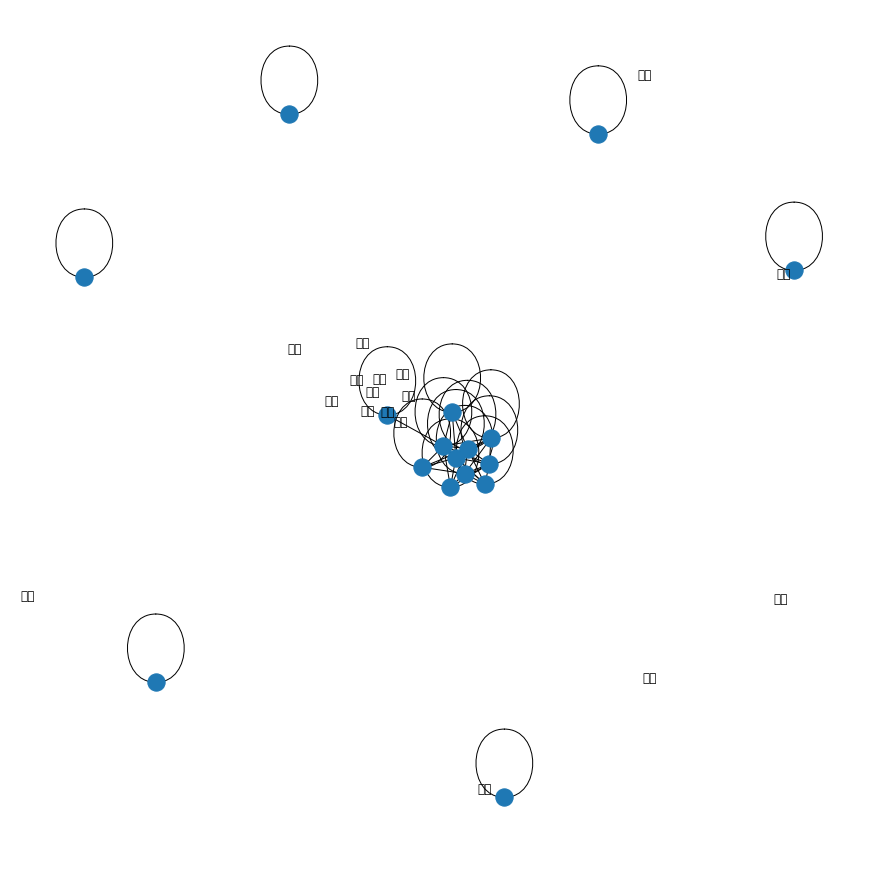

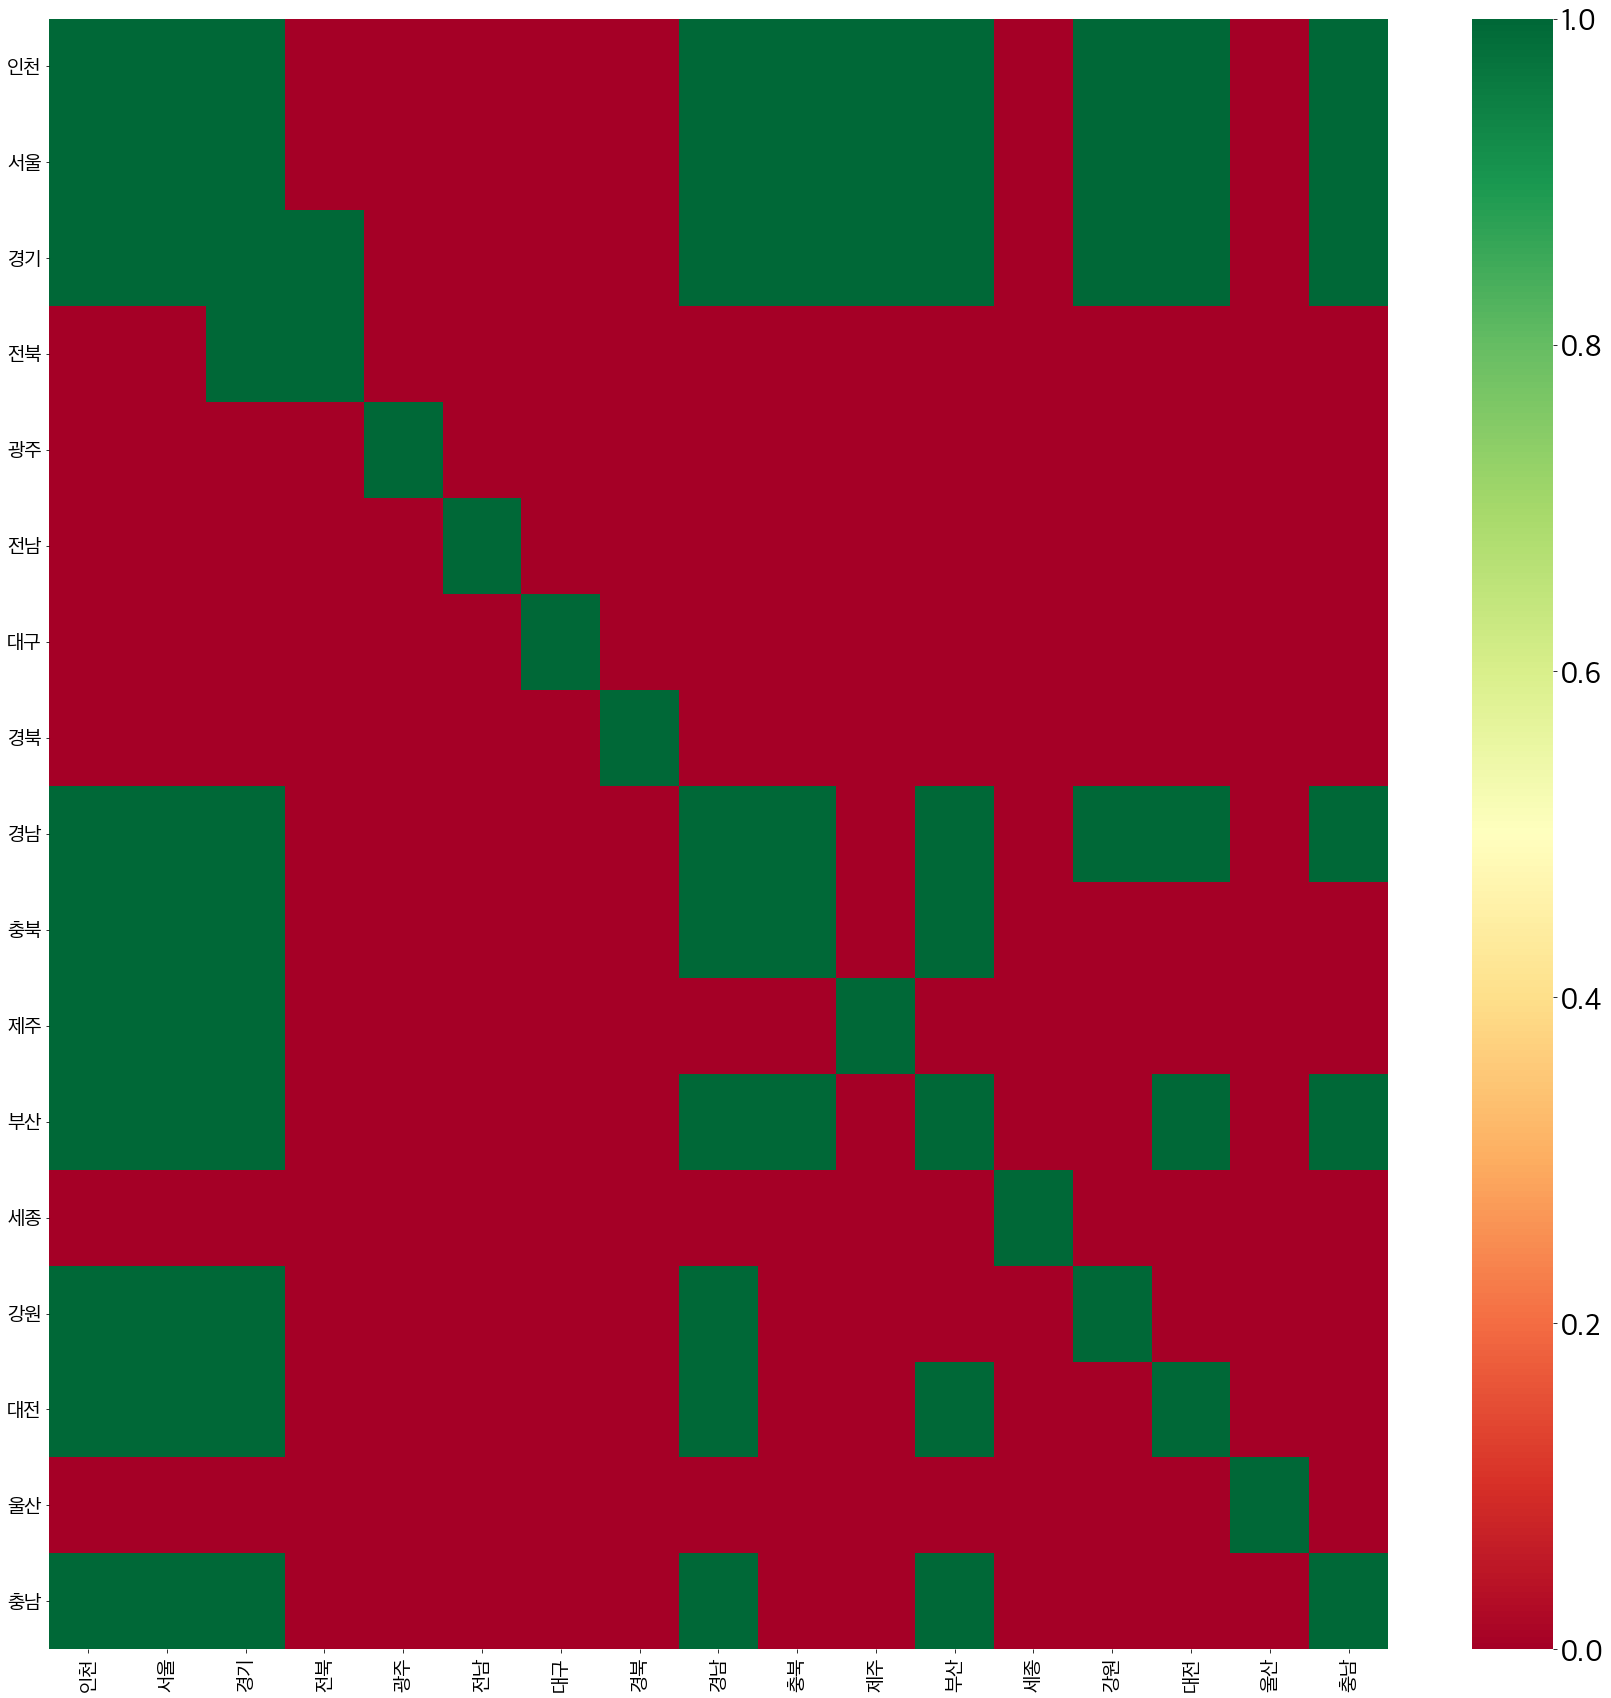

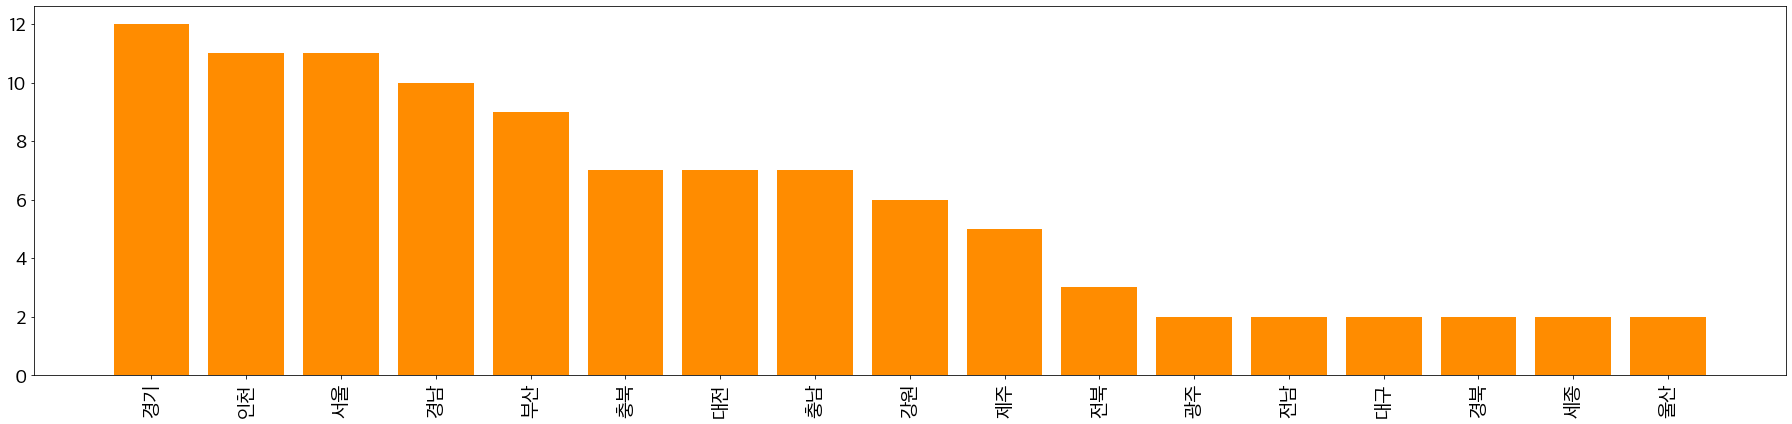

In [5]:
kn = KoreaNetwork(data = daily_df_state,
                  region_type = "state",
                  save_path = save_path)
edge_df = kn.make_network(threshold=0.7)
kn.draw_heatmap()
node = kn.save_network_html()
kn.save_degree_dist()
graph_df, test = kn.region_to_number_map()

In [9]:
graph_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
source,0,0,0,0,0,0,0,0,0,0,...,9,10,11,11,11,12,13,14,15,16
target,0,1,2,8,9,10,11,13,14,16,...,11,10,11,14,16,12,13,14,15,16


In [12]:
file_list = os.listdir('Data/State_R')
R_csv_list = []

for file in file_list:
    if file[-3:] == 'csv':
        R_csv_list.append(file)

In [42]:
d_data = daily_df_state['신고일'][:568]
a = pd.DataFrame({'Date' : d_data})

for R_csv in R_csv_list:
    
    r_data = pd.read_csv(f"Data/State_R/{R_csv}", index_col = 0)
    print(f"{R_csv}, : 길이 {len(r_data['Mean(R)'].values)}")
    
    c = [0 for i in range(568)]
    c[-len(r_data['Mean(R)'].values):] = r_data['Mean(R)'].values
    
    b = pd.DataFrame({f"{R_csv[:-7]}" : c})
    a = pd.concat([a, b], axis=1)

a = a.set_index('Date')
res = dict((v,k) for k,v in test.items())
new_col = []
for i in a.columns:
    new_col.append(str(res[i]))

a.columns = new_col
a = a.transpose()

a.to_csv('R_state.csv',encoding="euc-kr", index_label='Date')

인천_R_.csv, : 길이 568
세종_R_.csv, : 길이 534
경남_R_.csv, : 길이 536
울산_R_.csv, : 길이 534
충남_R_.csv, : 길이 532
대구_R_.csv, : 길이 544
부산_R_.csv, : 길이 535
전북_R_.csv, : 길이 557
경북_R_.csv, : 길이 538
경기_R_.csv, : 길이 562
대전_R_.csv, : 길이 535
강원_R_.csv, : 길이 535
광주_R_.csv, : 길이 553
제주_R_.csv, : 길이 535
전남_R_.csv, : 길이 551
서울_R_.csv, : 길이 563
충북_R_.csv, : 길이 536


In [6]:
pd.read_csv('R_state.csv', encoding="euc-kr", index_col=0)

,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,...,2021-07-30,2021-07-31,2021-08-01,2021-08-02,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08
0,0.902838,1.395003,1.950659,2.382527,2.764185,3.103751,3.403171,3.663939,3.888260,4.079105,...,0.924274,0.962330,0.977603,1.036122,1.034678,1.059492,1.043545,1.060312,1.052611,1.111206
12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.290167,1.142979,1.060095,1.027605,1.046696,0.941044,0.799789,0.766458,0.829834,0.902884
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.084489,1.065337,1.090423,1.097561,1.100971,1.102749,1.045483,0.987678,1.001429,0.970657
15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.355310,1.301744,1.445356,1.464801,1.423086,1.369657,1.239231,1.053836,1.053092,0.985253
16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.110132,1.129658,1.177089,1.187415,1.191787,1.136087,1.137116,1.096930,1.006783,0.969937
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.157103,1.203256,1.227947,1.194317,1.043647,0.918882,0.922674,1.022466,0.971370,0.900094
11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.185914,1.229075,1.198474,1.149274,1.116188,1.156226,1.174642,1.101540,1.049993,1.022001
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.017400,1.078415,1.152758,1.064835,1.063433,1.063617,0.997794,1.006198,1.003735,0.893676
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.317985,1.183159,1.218215,1.223151,1.196499,1.145709,1.104585,1.144955,1.201953,1.094324
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.527230,1.444730,1.393607,1.698501,...,1.029025,1.050168,1.051168,1.075265,1.089319,1.070524,1.065160,1.057516,1.027496,1.022850


In [7]:
con_df = pd.read_csv('Data/state_data.csv', encoding='cp949', index_col=0)


In [8]:
test = {}
for idx, region in enumerate(node):
    test[region] = idx

test['신고일'] = 'Date'
# 컬럼명 숫자로 변경
new_col = []
for i in con_df.columns:
    new_col.append(test[i])

con_df.columns = new_col
con_df = con_df.set_index('Date')
con_df = con_df.transpose()
con_df.to_csv('con_state.csv', encoding="euc-kr", index_label='Date')

In [43]:
os.getcwd()

'/Users/jeonjunhwi/문서/Projects/Master_GNN'

In [10]:
test

{'인천': 0,
 '서울': 1,
 '경기': 2,
 '전북': 3,
 '광주': 4,
 '전남': 5,
 '대구': 6,
 '경북': 7,
 '경남': 8,
 '충북': 9,
 '제주': 10,
 '부산': 11,
 '세종': 12,
 '강원': 13,
 '대전': 14,
 '울산': 15,
 '충남': 16,
 '신고일': 'Date'}